
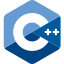
<br>

<div style="text-align:center; font-size:200%;">
 <b>Vektor (Teil 2)</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 11 Vektor (Teil 2).ipynb -->
<!-- slides/module_140_collections/topic_154_vector_part2.cpp -->


## Pfade

- Wir können uns jetzt wieder unserem Beispiel zuwenden.
- Um einen Pfad zu speichern, können wir einen Vektor von `Point`-Objekten
  verwenden:

In [ ]:
#include "point.hpp"


Dieser Header definiert die folgende Struktur:

```cpp
struct Point {
    double x;
    double y;
    double z;
};
```

Außerdem definiert er Funktionen zum Anzeigen von Punkten und Vektoren von
Punkten in Notebooks, sowie zum Ausgeben auf `std::cout`.

In [ ]:
Point p1{1.0, 2.0, 3.0};
Point p2{2.0, 3.0, 4.0};
Point p3{3.0, 4.0, 5.0};

In [ ]:
std::vector<Point> path{p1, p2, p3};

In [ ]:
std::vector<Point>{ {1, 2, 3}, {2, 3, 4}, {3, 4, 5} }

In [ ]:
std::cout << path;


- Vektoren werden "by value" an Funktionen übergeben und von Funktionen
  zurückgegeben.

In [ ]:
#include <iostream>

In [ ]:
void call_by_value(std::vector<Point> path)
{
    path.push_back({4, 5, 6});
    path[0] = {-1, -2, -3};
    std::cout << path << "\n";
}

In [ ]:
path

In [ ]:
call_by_value(path);

In [ ]:
path


- Wir können Vektoren als `const vector<T>&` übergeben, um sie nicht kopieren
  zu müssen:

In [ ]:
void print_path(const std::vector<Point>& path)
{
    std::cout << "Path:\n";
    for (const Point& p : path) {
        std::cout << "  " << p << "\n";
    }
}


- Wenn wir den Vektor verändern wollen übergeben wir ihn als `vector<T>&`:

In [ ]:
bool read_next_point(std::vector<Point>& path)
{
    std::cout << "Enter next point (x y z): ";
    Point p;
    std::cin >> p.x >> p.y >> p.z;
    if (!std::cin) {
        return false;
    }
    path.push_back(p);
    return true;
}

In [ ]:
std::vector<Point> path{p1, p2, p3};

In [ ]:
// read_next_point(path)


- Typischerweise geben wir Vektoren als Werte zurück.
- Seit C++11 ist das effizient möglich.
  - Move Semantik
  - Return Value Optimization (RVO)
- In älteren C++-Versionen wird der Vektor kopiert.
  - Daher gibt man oft einen Pointer zurück.
  - Damit muss man sich aber um die Speicherverwaltung kümmern.

In [ ]:
std::vector<Point> read_path()
{
    std::vector<Point> path{};
    while (read_next_point(path));
    return path;
}

In [ ]:
// path = read_path();


## Mini-Workshop: Regen-Daten

Ein Meteorologe möchte die Gesamtmenge an Regen für mehrere
aufeinanderfolgende Monate analysieren. Schreiben Sie ein Programm, das die
Regendaten (in mm) für jeden Monat vom Benutzer einliest und in einem Vektor
speichert. Berechnen und drucken Sie den Gesamtniederschlag während des
Zeitraums, den durchschnittlichen monatlichen Niederschlag und die Indizes
der Monate mit dem höchsten und dem niedrigsten Niederschlag.


Strukturieren Sie Ihr Programm in Funktionen, so dass jede eine klar
definierte Aufgabe erfüllt:

- `read_data()`: Liest die Regendaten vom Benutzer ein.
- `calculate_total()`: Berechnet und gibt den Gesamtniederschlag zurück.
- `calculate_mean()`: Berechnet und gibt den durchschnittlichen Niederschlag
  zurück.
- `calculate_min_indices()`: Berechnet und gibt die Indizes der Monate mit
   dem geringsten Niederschlag zurück.
- `calculate_max_indices()`: Berechnet und gibt die Indizes der Monate mit
   dem höchsten Niederschlag zurück.


### Hinweise:

- Verwenden Sie `std::vector<double>` um die Regendaten zu speichern.
- Sie können `std::numeric_limits<double>::max()` und
  `std::numeric_limits<double>::lowest()` als Startwerte für die Berechnung
  des minimalen und maximalen Niederschlags verwenden.
  [Hier](https://en.cppreference.com/w/cpp/types/numeric_limits) finden Sie
  weitere Informationen zu `std::numeric_limits`.
- Beachten Sie, dass es mehrere Monate geben kann, in denen der minimale oder
  maximale Niederschlag erreicht wird und dass die entsprechenden Funktionen
  daher Vektoren zurückgeben sollten.

In [ ]:
std::vector<double> data{2.0, 1.0, 5.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 4.0};